<a href="https://colab.research.google.com/github/ancestor9/2026_Spring_Pattern-Recognition/blob/main/Task_00_A_SGD_regression_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **단순회귀분석(Simple Linear Regression)**

## **1. Excel로 Sochastic Gradient Descent 구현하기**

- [click to get data]("https://github.com/ancestor9/ADSP-Crash-Course/blob/main/ADSP_%EA%B3%84%EC%82%B0%EB%AC%B8%EC%A0%9C.xlsx")

(np.float64(-0.5), np.float64(1787.5), np.float64(680.5), np.float64(-0.5))

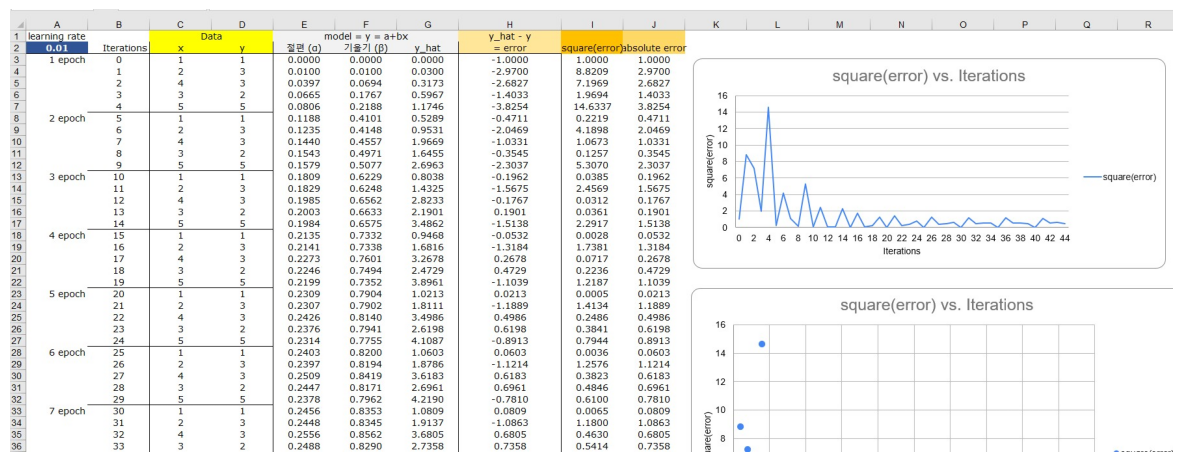

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 이미지 파일 경로
image_path = '/content/SGD.jpg'
img = mpimg.imread(image_path)
plt.figure(figsize=(15, 8))
plt.imshow(img)
plt.axis('off') # 축을 표시하지 않음

## **2. simpy 모듈로 구하기**

- **a. 실제 값**

$$
y_i = a x_i + b + \varepsilon_i
$$

- **b. 단순회귀식 모형**
$$
\hat{y} = a x_i + b
$$


- **c. 오차(Error)**
$$
\varepsilon_i = y_i - \hat{y}
$$


- **d. 오차(Error)의 제곱 (Squared Error)**
$$
(y_i - (a x_i + b))^2
$$

- **e. 전체 데이터에 대한 오차(Error)의 제곱의 합 (Sum of Squared Error)**
$$
\mathrm{SSE} = \sum_{i=1}^{n} (y_i - (a x_i + b))^2
$$


#### **2.1. 변수를 기준으로 수식(Algebra)으로 이해하기**

In [ ]:
import sympy as sp

# 1. 심볼 정의
a, b, x, y = sp.symbols('a b x y')

# 2. 손실 함수(오차제곱합) 정의 (한 점에 대하여) ---> c. 오차(Error)
loss = (y - (a * x + b))**2
loss

(-a*x - b + y)**2

#### **2.2. 추정하려는 parameter는 loss가 최소가 되게 하여야 함**
- 3차원 시각화 이해

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# 1. 심볼 정의 (기존 SAhP3WPxQy2v 셀에서 가져옴)
a, b = sp.symbols('a b')

# 2. 데이터셋 (x, y) (기존 SAhP3WPxQy2v 셀에서 가져옴)
data = [(1, 1), (2, 3), (3, 2), (4, 3), (5, 5)]

# 3. 비용 함수(SSE, 오차제곱합) 정의
# 각 데이터에 대해 (실제값 - 예측값)^2 을 모두 더함
sse = sum([(y_i - (a * x_i + b))**2 for x_i, y_i in data])

print(f"정의된 SSE 수식: {sse}")

정의된 SSE 수식: (-5*a - b + 5)**2 + (-4*a - b + 3)**2 + (-3*a - b + 2)**2 + (-2*a - b + 3)**2 + (-a - b + 1)**2


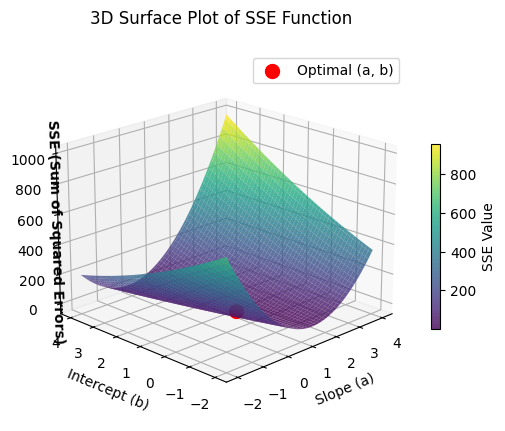

In [ ]:
# 4. a와 b에 대해 편미분 수행 (기존 tkwO8UaaUjTa 셀에서 가져옴)
diff_a = sp.diff(sse, a)
diff_b = sp.diff(sse, b)

# 5. 연립방정식 풀이 (solve 함수 사용) (기존 kPkI1xnjNb1n 셀에서 가져옴)
solution = sp.solve([diff_a, diff_b], [a, b])

# 6. 결과 출력 (기존 kPkI1xnjNb1n 셀에서 가져옴)
final_a = float(solution[a])
final_b = float(solution[b])

# SymPy 표현식을 수치 함수로 변환
f_sse = sp.lambdify((a, b), sse, 'numpy')

# a와 b의 범위 정의
a_range = np.linspace(-2, 4, 100) # 기울기 a 범위
b_range = np.linspace(-2, 4, 100) # 절편 b 범위

# 메쉬그리드 생성
A, B = np.meshgrid(a_range, b_range)

# SSE 값 계산
Z = f_sse(A, B)


# 3D 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 표면 플로팅
surf = ax.plot_surface(A, B, Z, cmap='viridis', edgecolor='none', alpha=0.8)

# 최적 해 지점 표시
ax.scatter(final_a, final_b, f_sse(final_a, final_b), color='red', s=100, label='Optimal (a, b)', zorder=5)

# --- Z축 라벨 위치 수정 부분 ---
ax.set_xlabel('Slope (a)')
ax.set_ylabel('Intercept (b)')

# 1. 라벨 회전을 끄고(False), 수평 정렬(horizontalalignment)을 조절합니다.
# 2. labelpad를 음수나 양수로 조절하여 왼쪽 상단 여백으로 밀어 넣습니다.
ax.set_zlabel('SSE (Sum of Squared Errors)',
              rotation=0,
              labelpad=-20,  # 값을 조절하여 왼쪽으로 밀기
              y=1.1,         # 상단 위치 조절
              fontdict={'fontsize': 10, 'fontweight': 'bold'})

# 3. 시점 조절 (라벨이 왼쪽 상단에 잘 보이도록 각도 조정)
ax.view_init(elev=20, azim=-135)

ax.set_title('3D Surface Plot of SSE Function', pad=20)
ax.legend()
plt.colorbar(surf, shrink=0.5, aspect=20, label='SSE Value')
plt.show()

- 2차원 시각화 이해(2 개 parameter에 대한 최소값)

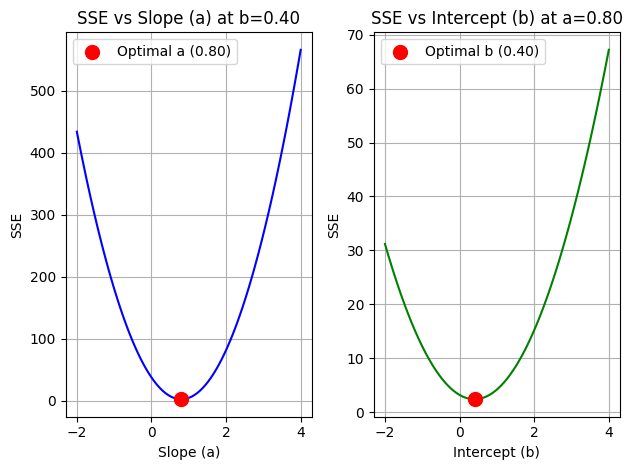

In [ ]:
# 한 줄에 두 개의 서브플롯 생성
fig, axes = plt.subplots(1, 2,)

# 첫 번째 서브플롯: SSE vs 'a' (b는 최적값으로 고정)
b_fixed = final_b
sse_a_values = f_sse(a_range, b_fixed)
axes[0].plot(a_range, sse_a_values, color='blue')
axes[0].scatter(final_a, f_sse(final_a, b_fixed), color='red', s=100, label=f'Optimal a ({final_a:.2f})', zorder=5)
axes[0].set_xlabel('Slope (a)')
axes[0].set_ylabel('SSE')
axes[0].set_title(f'SSE vs Slope (a) at b={b_fixed:.2f}')
axes[0].grid(True)
axes[0].legend()

# 두 번째 서브플롯: SSE vs 'b' (a는 최적값으로 고정)
a_fixed = final_a
sse_b_values = f_sse(a_fixed, b_range)
axes[1].plot(b_range, sse_b_values, color='green')
axes[1].scatter(final_b, f_sse(a_fixed, final_b), color='red', s=100, label=f'Optimal b ({final_b:.2f})', zorder=5)
axes[1].set_xlabel('Intercept (b)')
axes[1].set_ylabel('SSE')
axes[1].set_title(f'SSE vs Intercept (b) at a={a_fixed:.2f}')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout() # 서브플롯 간의 간격 조정
plt.show()

#### **2.3. 추정하려는 parameter는 loss가 최소되게 하려면**
- 미분방정식(Differential Equation)


- **a에 대한 편미분**

$$\frac{\partial}{\partial a} (y - (ax + b))^2
= -2x (y - (ax + b))
$$

- **b에 대한 편미분**
$$
\frac{\partial}{\partial b} (y - (ax + b))^2
= -2 (y - (ax + b))
$$

In [ ]:
# 3. a와 b에 대해 각각 편미분
diff_a = sp.diff(loss, a)
diff_b = sp.diff(loss, b)

print(f"기울기 a에 대한 미분식: {diff_a}")
print(f"절편 b에 대한 미분식: {diff_b}")

기울기 a에 대한 미분식: -2*x*(-a*x - b + y)
절편 b에 대한 미분식: 2*a*x + 2*b - 2*y


- 미분방정식이 최소가 되는, 즉 0이 되는 포인트

In [ ]:
# 4. a와 b에 대해 편미분 수행
diff_a = sp.diff(sse, a)
diff_b = sp.diff(sse, b)

print(f"a에 대한 미분식: {diff_a} = 0")
print(f"b에 대한 미분식: {diff_b} = 0")

a에 대한 미분식: 110*a + 30*b - 100 = 0
b에 대한 미분식: 30*a + 10*b - 28 = 0


In [ ]:
# 5. 연립방정식 풀이 (solve 함수 사용)
solution = sp.solve([diff_a, diff_b], [a, b])

# 6. 결과 출력
final_a = float(solution[a])
final_b = float(solution[b])

print("-" * 30)
print(f"최적의 기울기 (a): {final_a:.2f}")
print(f"최적의 절편 (b): {final_b:.2f}")
print(f"최종 회귀식: y = {final_a:.2f}x + {final_b:.2f}")

------------------------------
최적의 기울기 (a): 0.80
최적의 절편 (b): 0.40
최종 회귀식: y = 0.80x + 0.40


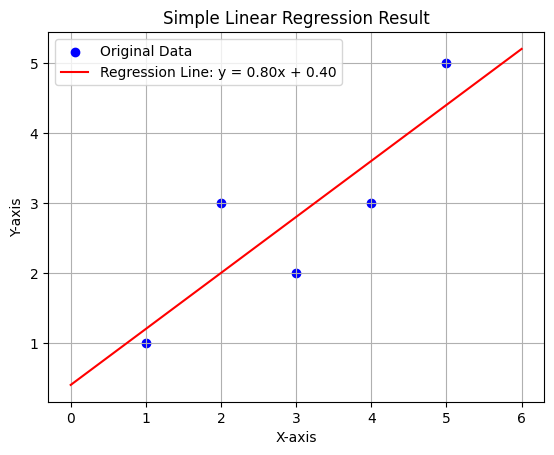

In [ ]:
# 원본 데이터 추출
x_data_original = np.array([d[0] for d in data])
y_data_original = np.array([d[1] for d in data])

# 회귀선 그리기 위한 x 값 범위 생성
x_line = np.linspace(min(x_data_original) - 1, max(x_data_original) + 1, 100)
y_line = final_a * x_line + final_b
# 원본 데이터 시각화
plt.scatter(x_data_original, y_data_original, color='blue', label='Original Data')
# 회귀선 시각화
plt.plot(x_line, y_line, color='red', label=f'Regression Line: y = {final_a:.2f}x + {final_b:.2f}')

plt.title('Simple Linear Regression Result')
plt.xlabel('X-axis'); plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

## **2. scikit-learn으로 학습하기**

-**[OLS(Ordinary Least Square)]("https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares")**


$$
\min_{w} \; \|Xw - y\|_2^2
$$


- $\min_{w}$ : 가중치 벡터 $w$에 대해 최소화

- $\| \cdot \|_2$ : L2 노름 (유클리디안 노름)

- $\|Xw - y\|_2^2$ : 잔차 벡터의 제곱합 (SSE)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 2. 데이터셋 (x, y)
data = [(1, 1), (2, 3), (3, 2), (4, 3), (5, 5)]

# 데이터 준비 (scikit-learn 입력 형식에 맞게)
X = np.array([d[0] for d in data]).reshape(-1, 1) # 특성 데이터 (x 값)
y = np.array([d[1] for d in data]) # 타겟 데이터 (y 값)

# Linear Regression 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X, y)

# 결과 추출
final_a_sklearn = model.coef_[0]
final_b_sklearn = model.intercept_

print("-" * 30)
print(f"scikit-learn 최적의 기울기 (a): {final_a_sklearn:.2f}")
print(f"scikit-learn 최적의 절편 (b): {final_b_sklearn:.2f}")
print(f"scikit-learn 최종 회귀식: y = {final_a_sklearn:.2f}x + {final_b_sklearn:.2f}")

------------------------------
scikit-learn 최적의 기울기 (a): 0.80
scikit-learn 최적의 절편 (b): 0.40
scikit-learn 최종 회귀식: y = 0.80x + 0.40


## **3. statsmodels 모듈로 학습하기**

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols

# 1. 데이터 준비 (DataFrame 형태가 필요합니다)
data = [(1, 1), (2, 3), (3, 2), (4, 3), (5, 5)]
df = pd.DataFrame(data, columns=['x', 'y'])

# 2. 모델 생성 및 학습 (y ~ x 형식은 "y는 x의 영향을 받는다"는 뜻)
model = ols('y ~ x', data=df).fit()

# 3. 결과 요약 출력
print(model.summary())

# 4. 절편(Intercept)과 기울기(x)만 따로 확인
print("\n" + "="*30)
print(f"절편 (Intercept): {model.params['Intercept']:.3f}")
print(f"기울기 (x): {model.params['x']:.3f}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     8.000
Date:                Tue, 24 Feb 2026   Prob (F-statistic):             0.0663
Time:                        02:46:49   Log-Likelihood:                -5.2598
No. Observations:                   5   AIC:                             14.52
Df Residuals:                       3   BIC:                             13.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4000      0.938      0.426      0.6

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


## **Shallow Learning**
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20251209120638608023/bhu.webp">

## **4. pytorch으로 학습하기**
### 4.1. requires_grad=True를 사용하여 구하기

In [ ]:
import torch

# 1. 데이터 정의
data = [(1, 1), (2, 3), (3, 2), (4, 3), (5, 5)]
x_train = torch.FloatTensor([[item[0]] for item in data])
y_train = torch.FloatTensor([[item[1]] for item in data])

# 2. 가중치(w)와 편향(b) 초기화 (학습 가능하도록 설정)
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 3. 옵티마이저 설정 (경사 하강법)
optimizer = torch.optim.SGD([w, b], lr=0.01)

# 4. 학습 시작
epochs = 2000
for epoch in range(epochs + 1):
    # H(x) 계산 (예측값)
    prediction = x_train * w + b

    # Cost 계산 (MSE - 평균 제곱 오차)
    cost = torch.mean((prediction - y_train) ** 2)

    # Gradient 계산 및 가중치 업데이트
    optimizer.zero_grad() # 기울기 초기화
    cost.backward()       # 역전파로 기울기 계산
    optimizer.step()      # 가중치 수정

    if epoch % 400 == 0:
        print(f'Epoch {epoch:4d}/{epochs} w: {w.item():.3f}, b: {b.item():.3f} Cost: {cost.item():.6f}')

print(f'\n최종 결과 - 기울기(w): {w.item():.3f}, 절편(b): {b.item():.3f}')

Epoch    0/2000 w: 0.200, b: 0.056 Cost: 9.600000
Epoch  400/2000 w: 0.812, b: 0.357 Cost: 0.480333
Epoch  800/2000 w: 0.803, b: 0.389 Cost: 0.480022
Epoch 1200/2000 w: 0.801, b: 0.397 Cost: 0.480002
Epoch 1600/2000 w: 0.800, b: 0.399 Cost: 0.480000
Epoch 2000/2000 w: 0.800, b: 0.400 Cost: 0.480000

최종 결과 - 기울기(w): 0.800, 절편(b): 0.400


### 4.2. backward()를 사용하여 구하기

In [ ]:
import torch

# 데이터 준비
x_train = torch.FloatTensor([1, 2, 3, 4, 5])
y_train = torch.FloatTensor([1, 3, 2, 3, 5])

# 기울기(w)와 절편(b) 초기화
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

learning_rate = 0.01

for epoch in range(1001):
    # 1. 가설 수립
    hypothesis = x_train * w + b

    # 2. 손실 함수 (Mean Squared Error)
    # MSE = 1/n * Σ(y_pred - y_true)^2
    cost = torch.mean((hypothesis - y_train) ** 2)

    # 3. backward() 호출: 자동 미분 실행
    # 이 함수가 실행되면 w.grad와 b.grad에 각각의 편미분값이 저장됩니다.
    cost.backward()

    # 4. 경사 하강법 (Gradient Descent) 수동 업데이트
    # torch.no_grad() 내부에서 수행해야 gradient 연산 기록에 남지 않습니다.
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

        # 업데이트 후 기울기를 0으로 초기화 (안 하면 다음 루프에서 누적됨)
        w.grad.zero_()
        b.grad.zero_()

    if epoch % 200 == 0:
        print(f'Epoch {epoch:4d} w: {w.item():.3f} b: {b.item():.3f} Cost: {cost.item():.6f}')


print(f'\n최종 결과 - 기울기(w): {w.item():.3f}, 절편(b): {b.item():.3f}')

Epoch    0 w: 0.200 b: 0.056 Cost: 9.600000
Epoch  200 w: 0.823 b: 0.316 Cost: 0.481290
Epoch  400 w: 0.812 b: 0.357 Cost: 0.480333
Epoch  600 w: 0.806 b: 0.378 Cost: 0.480086
Epoch  800 w: 0.803 b: 0.389 Cost: 0.480022
Epoch 1000 w: 0.802 b: 0.394 Cost: 0.480006

최종 결과 - 기울기(w): 0.802, 절편(b): 0.394


## **5. tensorflow로 학습하기**

### 5.1. tf.GradientTape를 이용한 방식 (Low-level)

이 방식은 PyTorch에서 backward()를 사용했던 것과 가장 흡사합니다. 연산 과정을 "테이프"에 기록하고, 나중에 그 테이프를 역으로 재생하며 기울기를 계산합니다.

In [ ]:
import tensorflow as tf

# 데이터 정의
x_train = [1.0, 2.0, 3.0, 4.0, 5.0]
y_train = [1.0, 3.0, 2.0, 3.0, 5.0]

# 가중치와 편향 초기화
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

learning_rate = 0.01

for i in range(2001):
    with tf.GradientTape() as tape:
        # 1. 가설 설정 (y = Wx + b)
        hypothesis = x_train * W + b
        # 2. 손실 함수 (MSE)
        cost = tf.reduce_mean(tf.square(hypothesis - y_train))

    # 3. 미분 계산 (PyTorch의 backward 역할)
    W_grad, b_grad = tape.gradient(cost, [W, b])

    # 4. 파라미터 업데이트 (경사 하강법)
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)

    if i % 400 == 0:
        print(f"Step {i:4d} | Cost: {cost.numpy():.4f} | W: {W.numpy()[0]:.3f} | b: {b.numpy()[0]:.3f}")

Step    0 | Cost: 21.6378 | W: -0.250 | b: 0.367
Step  400 | Cost: 0.4807 | W: 0.783 | b: 0.462
Step  800 | Cost: 0.4800 | W: 0.796 | b: 0.416
Step 1200 | Cost: 0.4800 | W: 0.799 | b: 0.404
Step 1600 | Cost: 0.4800 | W: 0.800 | b: 0.401
Step 2000 | Cost: 0.4800 | W: 0.800 | b: 0.400


### 5.2. Keras Sequential API를 이용한 방식 (High-level)
모델의 구조를 정의하고 compile, fit 함수를 사용하여 내부적인 미분과 업데이트 과정을 자동화합니다.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential, optimizers
import numpy as np

# 데이터 (Keras는 입력을 numpy 배열 형태로 받는 것이 일반적입니다)
x_data = np.array([1, 2, 3, 4, 5], dtype=float)
y_data = np.array([1, 3, 2, 3, 5], dtype=float)

# 1. 모델 정의 (입력 1개, 출력 1개인 선형 레이어)
model = Sequential([
    layers.Dense(units=1, input_shape=[1])
])

'''
# 활성화 함수는 linear로 설정 (선형 함수)

model = Sequential([
    # activation='linear'는 입력된 값을 그대로 통과시킵니다 (f(x) = x)
    layers.Dense(units=1, input_shape=[1],
    activation='linear')
])
'''
# 2. 컴파일 (손실 함수와 옵티마이저 설정)
model.compile(
    optimizer=optimizers.SGD(learning_rate=0.01),
    loss='mse'
)

# 3. 학습 실행
model.fit(x_data, y_data, epochs=500, verbose=0)

# 결과 출력
weights = model.get_weights()
print(f"최종 결과 - 기울기(W): {weights[0][0][0]:.3f}, 절편(b): {weights[1][0]:.3f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


최종 결과 - 기울기(W): 0.794, 절편(b): 0.422


####(참고) 활성화 함수(Activation Function)

활성화 함수는 주로 **데이터의 관계가 비선형적(직선 하나로 표현 안 됨)** 일 때 사용

- ReLU: 딥러닝 내부 레이어에서 학습 속도를 높이기 위해 가장 많이 사용

- Sigmoid: 결과값이 0~1 사이여야 하는 이진 분류(Yes/No) 문제의 마지막 층에 사용

- Softmax: 여러 개의 클래스 중 하나를 고르는 다중 분류 문제의 마지막 층에 사용